# 대분류명으로 부터 중분류명 생성

    * 검색어(sech_kwd)와 롯데홈쇼핑사이트 크롤링을 통해 얻은 대분류명(sech_clac_nm1)를 활용하여 중분류명(sech_clac_nm2) 생성
    * 실제 거래정보내 해당 대분류안에서 거래가 이루어진 중분류명 비율을 적용하여 랜덤하게 생성

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt

import random
random.seed(1)

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.8/site-packages/tqdm/std.py:725: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


 * raw 데이터 불러오기

In [2]:
# 1. 온라인 행동 데이터
raw_data1_Online_Act = pd.read_csv('./data/data1_Online_Act.csv')

# 2. 거래 정보 데이터
raw_data2_Trade_Inform = pd.read_csv('./data/data2_Trade_Inform.csv')

# 3. 사용자 demo 정보(나이, 성별)
raw_data3_Demog = pd.read_csv('./data/data3_Demog.csv')

# 4. 상품 대중소 분류 정보
raw_data4_Item_Class = pd.read_csv('./data/data4_Item_Class.csv')

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### 2. 거래정보와 4. 분류명 정보를 결합하여 각 대분류 내에서 중분류의 거래 비율이 얼마나 되는지 확인

In [11]:
raw_data2_Trade_Inform

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,21922,104999,1,A03,unknown,20190920,12:41,5990,1
1,21279,104907,4,A03,unknown,20190920,10:27,10900,1
2,39423,105124,11,A03,unknown,20190920,17:26,12900,1
3,18362,104010,1,A03,unknown,20190920,09:57,9900,1
4,39423,105124,13,A03,0565,20190920,17:26,2990,1
...,...,...,...,...,...,...,...,...,...
599956,35311,2839,3,B03,0339,20190927,14:09,3500,1
599957,35311,2839,4,B03,0339,20190927,14:09,3600,2
599958,35311,2839,5,B03,0339,20190927,14:09,3500,1
599959,35311,2839,2,B03,0339,20190927,14:09,4500,1


In [15]:
raw_data4_Item_Class.head(3)

,pd_c,clac_nm1,clac_nm2,clac_nm3
0,1,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Automobile Oil / Additives
1,2,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Lights
2,3,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Paint


 * 결측치 확인

In [95]:
raw_data4_Item_Class.isna().sum()

pd_c        0
clac_nm1    0
clac_nm2    0
clac_nm3    2
dtype: int64

 * 2.거래정보 데이터에 4.상품분류명 데이터 병합

    * merge의 key역할을 수행하기 위해 raw_data4_Item_Class['pd_c'] data를 raw_data2와 동일한 str 형으로 변경
    
     ### 4. 데이터 병합을 위하여 상품 이름정보의 pd_c 데이터 타입 변경 (int -> str)
     * raw_data2_Trade_Inform에 있는 pd_c열의 경우, NaN과 unknown 값을 포함하기 때문에,  
       자료형을 int나 float로 변경할 수 없음(변경 시, 에러 발생)
     * 따라서 4. 상품 이름 정보의 pd_c를 str 형으로 자료형 변경
     * 그냥 object 형으로만 변경 시, 값이 같아도
         merge_raw123 에서는 pd_c = '0062'(str형)으로 인식하고,
         4. 상품이름 정보에서는 pd_c = 62(int형으로 인식해서 병합 시, 데이터 matching이 안됨

In [3]:
# 4. 상품 이름 데이터의 'pd_c' 열의 값을 4자리 숫자로 변환합니다.
# 예시) '1' => '0001', '62' => '0062', '773' => '0773' 

raw_data4_Item_Class['pd_c'] = raw_data4_Item_Class['pd_c'].astype('str')

cnt_add_zero = 0

for i in range(999):
    cnt_add_zero = 4 - len(raw_data4_Item_Class['pd_c'][i])
    add_zero = "0" * cnt_add_zero
    raw_data4_Item_Class['pd_c'][i] = add_zero + raw_data4_Item_Class['pd_c'][i]

In [4]:
merge_raw24 = pd.merge(raw_data2_Trade_Inform, raw_data4_Item_Class, on='pd_c', how='left')

In [5]:
merge_raw24

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,clac_nm1,clac_nm2,clac_nm3
0,21922,104999,1,A03,unknown,20190920,12:41,5990,1,NaN,NaN,NaN
1,21279,104907,4,A03,unknown,20190920,10:27,10900,1,NaN,NaN,NaN
2,39423,105124,11,A03,unknown,20190920,17:26,12900,1,NaN,NaN,NaN
3,18362,104010,1,A03,unknown,20190920,09:57,9900,1,NaN,NaN,NaN
4,39423,105124,13,A03,0565,20190920,17:26,2990,1,Fruits,Imported Fruits,Bananas
...,...,...,...,...,...,...,...,...,...,...,...,...
599956,35311,2839,3,B03,0339,20190927,14:09,3500,1,Cosmetics / Beauty Care,Skin Care,Facial Masks
599957,35311,2839,4,B03,0339,20190927,14:09,3600,2,Cosmetics / Beauty Care,Skin Care,Facial Masks
599958,35311,2839,5,B03,0339,20190927,14:09,3500,1,Cosmetics / Beauty Care,Skin Care,Facial Masks
599959,35311,2839,2,B03,0339,20190927,14:09,4500,1,Cosmetics / Beauty Care,Skin Care,Facial Masks


 * 실제 거래에서 각 대분류(clac_nm1) 별 거래 갯수 확인

In [6]:
merge_raw24['clac_nm1'].value_counts()

Vegetables                                   69308
Snack Foods                                  58880
Dairy Products                               46474
Meats                                        44157
Chilled Foods                                43926
Substitute Foods                             42477
Beverages                                    34756
Fruits                                       33540
Frozen Foods                                 30104
Spices / Seasonings                          20425
Liquors / Alcoholic Beverages                16279
Kitchenware                                  12588
Cleaning / Laundry / Bathroom Accessories    12157
Detergents / Hygiene Goods                   11942
Sea Foods                                     9897
Personal Care                                 8858
Dried Sea Foods                               8652
Canned / Jarred Foods                         7715
Cosmetics / Beauty Care                       7252
Cooked Foods                   

 * 실제 거래에서 각 대분류(clac_nm1) 별 중분류(clac_nm2) 갯수 확인

In [7]:
merge_raw24['clac_nm2'][merge_raw24['clac_nm1'] == 'Cooked Foods'].value_counts()

Chilled Snacks            3488
Hot Snacks                1781
Bakery                    1190
Cooked Side Dishes         343
Traditional Rice Cakes     251
Name: clac_nm2, dtype: int64

In [8]:
bar_label = list(merge_raw24['clac_nm2'][merge_raw24['clac_nm1'] == 'Cooked Foods'].value_counts().index)
bar_label

['Chilled Snacks',
 'Hot Snacks',
 'Bakery',
 'Cooked Side Dishes',
 'Traditional Rice Cakes']

In [9]:
values = list(merge_raw24['clac_nm2'][merge_raw24['clac_nm1'] == 'Cooked Foods'].value_counts())
values

[3488, 1781, 1190, 343, 251]

Text(0.5, 1.0, 'Cooked Foods')

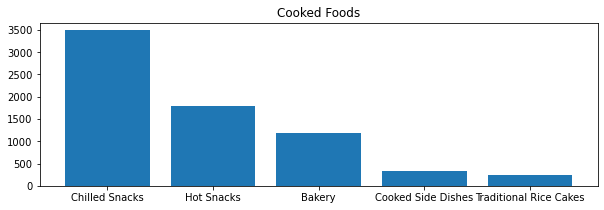

In [10]:
name = bar_label

plt.figure(figsize = (10, 3))
plt.bar(name, values)
plt.title('Cooked Foods')

In [11]:
merge_raw24['clac_nm2'][merge_raw24['clac_nm1'] == 'Vegetables'].value_counts()

Tofu / Bean Sprouts       18153
Leaf Vegetables           15594
Fruit Vegetables          14155
Mushrooms                  7244
Root Vegetables            6903
Western Vegetables         6166
Korean Greens / Namuls      792
Chinese Herb Medicines      284
Vegetable Gift Sets          17
Name: clac_nm2, dtype: int64

 * 대분류가 'Vegetables' 일 때, 각 중분류가 나올 확률

In [12]:
merge_raw24['clac_nm2'][merge_raw24['clac_nm1'] == 'Vegetables'].value_counts() / merge_raw24['clac_nm2'][merge_raw24['clac_nm1'] == 'Vegetables'].value_counts().sum()

Tofu / Bean Sprouts       0.261918
Leaf Vegetables           0.224996
Fruit Vegetables          0.204233
Mushrooms                 0.104519
Root Vegetables           0.099599
Western Vegetables        0.088965
Korean Greens / Namuls    0.011427
Chinese Herb Medicines    0.004098
Vegetable Gift Sets       0.000245
Name: clac_nm2, dtype: float64

In [13]:
list(merge_raw24['clac_nm2'][merge_raw24['clac_nm1'] == 'Vegetables'].value_counts() / merge_raw24['clac_nm2'][merge_raw24['clac_nm1'] == 'Vegetables'].value_counts().sum())

[0.26191781612512266,
 0.22499567149535407,
 0.2042332775437179,
 0.10451895885034916,
 0.09959889190281064,
 0.08896519882264674,
 0.011427252265250765,
 0.0040976510648121425,
 0.0002452819299359381]

 * 대분류'Vegetables'내 중분류 리스트

In [14]:
ind = list(merge_raw24['clac_nm2'][merge_raw24['clac_nm1'] == 'Vegetables'].value_counts().index)
ind

['Tofu / Bean Sprouts',
 'Leaf Vegetables',
 'Fruit Vegetables',
 'Mushrooms',
 'Root Vegetables',
 'Western Vegetables',
 'Korean Greens / Namuls',
 'Chinese Herb Medicines',
 'Vegetable Gift Sets']

 * 대분류 리스트

In [15]:
list_clac_nm1 = list(merge_raw24['clac_nm1'].value_counts().index)
list_clac_nm1

['Vegetables',
 'Snack Foods',
 'Dairy Products',
 'Meats',
 'Chilled Foods',
 'Substitute Foods',
 'Beverages',
 'Fruits',
 'Frozen Foods',
 'Spices / Seasonings',
 'Liquors / Alcoholic Beverages',
 'Kitchenware',
 'Cleaning / Laundry / Bathroom Accessories',
 'Detergents / Hygiene Goods',
 'Sea Foods',
 'Personal Care',
 'Dried Sea Foods',
 'Canned / Jarred Foods',
 'Cosmetics / Beauty Care',
 'Cooked Foods',
 'Tenants / Restaurants',
 "Women's Clothing",
 'Underwear / Socks and Hosiery / Homewear',
 'Coffee / Tea',
 'Grains',
 'Fashion Accessories',
 'Toy',
 'Stationary / Office Supplies',
 'Health Foods',
 'Baby Foods',
 'Birth Supplies / Baby Products',
 'Tableware / Cooking Utensils',
 'Gardening / Pets',
 'Sport Fashion',
 "Kids' Clothing",
 'Tools / Safety Supplies',
 'Bedding / Handicraft',
 "Men's Clothing",
 'Outdoor / Leisure Activities',
 'Automotive Products',
 'Health Care',
 'Others (Non-Products)',
 'Home / Kitchen Appliances',
 'Home Decor / Lighting',
 'Seasonal Spor

In [16]:
'Vegetables' in list_clac_nm1

True

 * 대분류명을 입력하면 해당 대분류 내에 중분류 비율에 맞추어 중분류명 반환하는 함수 정의

In [17]:
def clac_nm1_to_nm2(calc_name1):
    
    # 대분류명이 정상일 경우,
    if calc_name1 in list_clac_nm1:
        
        # 입력받은 대분류에 포함된 중분류 리스트
        c_nm2_list = list(merge_raw24['clac_nm2'][merge_raw24['clac_nm1'] == calc_name1].value_counts().index)
        
        # 대분류에 따른 중분류 확률
        probs = list(merge_raw24['clac_nm2'][merge_raw24['clac_nm1'] == calc_name1].value_counts() / merge_raw24['clac_nm2'][merge_raw24['clac_nm1'] == calc_name1].value_counts().sum())
        
        c_nm2_choiced = random.choices(c_nm2_list, weights = probs)
        
        return c_nm2_choiced[0]
    
    # 대분류명이 결측치 또는 비정상일 경우,
    else:
        return np.nan
    
    

 * 함수 동작 test

In [110]:
clac_nm1_to_nm2('unown')

nan

In [131]:
clac_nm1_to_nm2(merge_table['sech_clac_nm1'][0])

nan

In [129]:
clac_nm1_to_nm2('Vegetables')

'Leaf Vegetables'

 * Merge Data 불러오기

In [18]:
merge_table = pd.read_csv("merge_sech_clac_nm1.csv")
merge_table.drop("Unnamed: 0", axis=1, inplace=True)

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (17,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [19]:
merge_table

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3,pd_c_2,sech_kwd_over_3,sech_kwd_cat_0,sech_kwd_cat_1,sech_clac_nm1
0,72429,1,2,2,A03,20190919,22:09,842130,NaN,NaN,...,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,72429,1,1,1,A03,20190919,22:09,839064,NaN,NaN,...,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,72428,5,1,0,A01,20190918,06:37,12568,NaN,라인에디션블라우스,...,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,72428,4,1,0,A01,20190914,23:42,243555,NaN,펜디가방,...,unknown,unknown,NaN,NaN,NaN,NaN,펜디가방,명품/쥬얼리,수입명품/해외배송,Fashion Accessories
4,72428,3,3,0,A01,20190914,21:50,839771,NaN,페레가모가방,...,unknown,unknown,NaN,NaN,NaN,NaN,페레가모가방,명품/쥬얼리,수입명품/해외배송,Fashion Accessories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196357,1,2,2,0,A01,20190922,14:10,56113,NaN,초등가을점퍼,...,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3196358,1,2,1,0,A01,20190922,14:09,41584,NaN,초등가을잠바,...,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3196359,1,1,3,0,A01,20190911,16:15,36140,NaN,과일바구니,...,unknown,unknown,NaN,NaN,NaN,NaN,과일바구니,여행/렌탈/금융,렌탈/배달/케어,Living / Rental Services
3196360,1,1,2,0,A01,20190911,16:15,22432,NaN,과일선물세트 백화점,...,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
merge_table[['clnt_id', 'sess_id', 'biz_unit', 'sess_dt', 'hit_tm', 'trans_id', 'action_type', 'clac_nm2']][165:169]

,clnt_id,sess_id,biz_unit,sess_dt,hit_tm,trans_id,action_type,clac_nm2
165,2,10,A03,20190801,21:59,NaN,5,NaN
166,2,10,A03,20190801,22:00,NaN,2,NaN
167,2,10,A03,20190801,22:00,NaN,1,NaN
168,2,10,A03,20190801,22:00,65505.0,6,Coffee Drinks


In [57]:
merge_table.sort_values(by=['clnt_id', 'sess_id', 'sess_dt', 'hit_tm'], inplace=True)

In [67]:
merge_table.reset_index(drop=True, inplace=True)

In [68]:
merge_table

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3,pd_c_2,sech_kwd_over_3,sech_kwd_cat_0,sech_kwd_cat_1,sech_clac_nm1
0,1,1,1,0,A01,20190911,16:14,11880,NaN,과일선물세트,...,unknown,unknown,NaN,NaN,NaN,NaN,과일선물세트,식품,신선식품,Chilled Foods
1,1,1,3,0,A01,20190911,16:15,36140,NaN,과일바구니,...,unknown,unknown,NaN,NaN,NaN,NaN,과일바구니,여행/렌탈/금융,렌탈/배달/케어,Living / Rental Services
2,1,1,2,0,A01,20190911,16:15,22432,NaN,과일선물세트 백화점,...,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,1,0,A01,20190922,14:09,41584,NaN,초등가을잠바,...,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2,3,0,A01,20190922,14:10,70025,NaN,초등남아옷,...,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196357,72428,3,3,0,A01,20190914,21:50,839771,NaN,페레가모가방,...,unknown,unknown,NaN,NaN,NaN,NaN,페레가모가방,명품/쥬얼리,수입명품/해외배송,Fashion Accessories
3196358,72428,4,1,0,A01,20190914,23:42,243555,NaN,펜디가방,...,unknown,unknown,NaN,NaN,NaN,NaN,펜디가방,명품/쥬얼리,수입명품/해외배송,Fashion Accessories
3196359,72428,5,1,0,A01,20190918,06:37,12568,NaN,라인에디션블라우스,...,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3196360,72429,1,2,2,A03,20190919,22:09,842130,NaN,NaN,...,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
merge_table[['clnt_id', 'sess_id', 'biz_unit', 'sess_dt', 'hit_tm', 'trans_id', 'action_type', 'clac_nm2']][merge_table['action_type']==6].head(50)

,clnt_id,sess_id,biz_unit,sess_dt,hit_tm,trans_id,action_type,clac_nm2
45,2,1,A03,20190728,23:47,62037.0,6,Coffee Drinks
144,2,8,A03,20190731,21:25,64691.0,6,NaN
168,2,10,A03,20190801,22:00,65505.0,6,Coffee Drinks
248,2,19,A03,20190830,22:00,88495.0,6,NaN
270,4,1,A01,20190826,10:38,85046.0,6,NaN
426,9,6,A03,20190708,13:48,45242.0,6,NaN
550,9,26,A03,20190904,21:36,92448.0,6,NaN
607,12,1,A01,20190718,10:10,54099.0,6,NaN
698,17,3,A03,20190731,01:07,64325.0,6,NaN
720,19,1,A01,20190810,16:33,72882.0,6,NaN


 * 함수 수행시간이 너무 길어서 데이터를 쪼개서 수행 (40만개씩 8분할)

In [142]:
merge_table_1 = merge_table[0:400000]
merge_table_2 = merge_table[400000:800000]
merge_table_3 = merge_table[800000:1200000]
merge_table_4 = merge_table[1200000:1600000]
merge_table_5 = merge_table[1600000:2000000]
merge_table_6 = merge_table[2000000:2400000]
merge_table_7 = merge_table[2400000:2800000]
merge_table_8 = merge_table[2800000:3196362]

 * 0 ~ 40만개

In [143]:
merge_table_1['sech_clac_nm2'] = merge_table_1['sech_clac_nm1'].progress_map(clac_nm1_to_nm2)

100%|██████████| 400000/400000 [3:04:43<00:00, 36.09it/s]  
<ipython-input-143-13ee25f0da8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_table_1['sech_clac_nm2'] = merge_table_1['sech_clac_nm1'].progress_map(clac_nm1_to_nm2)


In [144]:
merge_table_1.to_csv("merge_1_create_sech_clac_nm2.csv")

 * 40 ~ 80만개

In [145]:
merge_table_2['sech_clac_nm2'] = merge_table_2['sech_clac_nm1'].progress_map(clac_nm1_to_nm2)

100%|██████████| 400000/400000 [3:04:13<00:00, 36.19it/s]  
<ipython-input-145-d89fa8feeace>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_table_2['sech_clac_nm2'] = merge_table_2['sech_clac_nm1'].progress_map(clac_nm1_to_nm2)


In [146]:
merge_table_2.to_csv("merge_2_create_sech_clac_nm2.csv")

 * 80 ~ 120만개

In [147]:
merge_table_3['sech_clac_nm2'] = merge_table_3['sech_clac_nm1'].progress_map(clac_nm1_to_nm2)

100%|██████████| 400000/400000 [2:58:18<00:00, 37.39it/s]  
<ipython-input-147-ce8c9be0bedb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_table_3['sech_clac_nm2'] = merge_table_3['sech_clac_nm1'].progress_map(clac_nm1_to_nm2)


In [148]:
merge_table_3.to_csv("merge_3_create_sech_clac_nm2.csv")

 * 120 ~ 160만개

In [166]:
# merge_table_4['sech_clac_nm2'] = merge_table_4['sech_clac_nm1'].progress_map(clac_nm1_to_nm2)

In [ ]:
# merge_table_4.to_csv("merge_4_create_sech_clac_nm2.csv")

 * 160 ~ 200만개

In [ ]:
# merge_table_5['sech_clac_nm2'] = merge_table_5['sech_clac_nm1'].progress_map(clac_nm1_to_nm2)

In [ ]:
# merge_table_5.to_csv("merge_5_create_sech_clac_nm2.csv")

 * 200 ~ 240만개

In [ ]:
# merge_table_6['sech_clac_nm2'] = merge_table_6['sech_clac_nm1'].progress_map(clac_nm1_to_nm2)

In [ ]:
# merge_table_6.to_csv("merge_6_create_sech_clac_nm2.csv")

 * 240 ~ 280만개

In [ ]:
# merge_table_7['sech_clac_nm2'] = merge_table_7['sech_clac_nm1'].progress_map(clac_nm1_to_nm2)

In [ ]:
# merge_table_7.to_csv("merge_7_create_sech_clac_nm2.csv")

 * 280 ~ 319만개

In [ ]:
# merge_table_8['sech_clac_nm2'] = merge_table_8['sech_clac_nm1'].progress_map(clac_nm1_to_nm2)

In [ ]:
# merge_table_8.to_csv("merge_8_create_sech_clac_nm2.csv")

In [ ]:
------------------------------------------------------------------------------------------------------------------------------------

In [162]:
merge_table_1 = pd.read_csv("merge_1_create_sech_clac_nm2.csv")
merge_table_1.drop("Unnamed: 0", axis=1, inplace=True)
merge_table_2 = pd.read_csv("merge_2_create_sech_clac_nm2.csv")
merge_table_2.drop("Unnamed: 0", axis=1, inplace=True)
merge_table_3 = pd.read_csv("merge_3_create_sech_clac_nm2.csv")
merge_table_3.drop("Unnamed: 0", axis=1, inplace=True)
merge_table_4 = pd.read_csv("merge_4_create_sech_clac_nm2.csv")
merge_table_4.drop("Unnamed: 0", axis=1, inplace=True)
merge_table_5 = pd.read_csv("merge_5_create_sech_clac_nm2.csv")
merge_table_5.drop("Unnamed: 0", axis=1, inplace=True)
merge_table_6 = pd.read_csv("merge_6_create_sech_clac_nm2.csv")
merge_table_6.drop("Unnamed: 0", axis=1, inplace=True)
merge_table_7 = pd.read_csv("merge_7_create_sech_clac_nm2.csv")
merge_table_7.drop("Unnamed: 0", axis=1, inplace=True)
merge_table_8 = pd.read_csv("merge_8_create_sech_clac_nm2.csv")
merge_table_8.drop("Unnamed: 0", axis=1, inplace=True)

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (17,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [163]:
merge_table_add_nm2_all = pd.concat([merge_table_1, merge_table_2, merge_table_3, merge_table_4, merge_table_5, merge_table_6, merge_table_7, merge_table_8])

In [164]:
merge_table_add_nm2_all

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,clnt_age,clac_nm1,clac_nm2,clac_nm3,pd_c_2,sech_kwd_over_3,sech_kwd_cat_0,sech_kwd_cat_1,sech_clac_nm1,sech_clac_nm2
0,72429,1,2,2,A03,20190919,22:09,842130,NaN,NaN,...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,72429,1,1,1,A03,20190919,22:09,839064,NaN,NaN,...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,72428,5,1,0,A01,20190918,06:37,12568,NaN,라인에디션블라우스,...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,72428,4,1,0,A01,20190914,23:42,243555,NaN,펜디가방,...,unknown,NaN,NaN,NaN,NaN,펜디가방,명품/쥬얼리,수입명품/해외배송,Fashion Accessories,Jewelry
4,72428,3,3,0,A01,20190914,21:50,839771,NaN,페레가모가방,...,unknown,NaN,NaN,NaN,NaN,페레가모가방,명품/쥬얼리,수입명품/해외배송,Fashion Accessories,Women's Shoes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396357,1,2,2,0,A01,20190922,14:10,56113,NaN,초등가을점퍼,...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396358,1,2,1,0,A01,20190922,14:09,41584,NaN,초등가을잠바,...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396359,1,1,3,0,A01,20190911,16:15,36140,NaN,과일바구니,...,unknown,NaN,NaN,NaN,NaN,과일바구니,여행/렌탈/금융,렌탈/배달/케어,Living / Rental Services,Living Services
396360,1,1,2,0,A01,20190911,16:15,22432,NaN,과일선물세트 백화점,...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
merge_table_add_nm2_all.to_csv("merge_all_create_sech_clac_nm2.csv")

 * 데이터 불러오기

In [4]:
merge_table_add_nm2_all = pd.read_csv("merge_all_create_sech_clac_nm2.csv")
merge_table_add_nm2_all.drop("Unnamed: 0", axis=1, inplace=True)

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (17,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
merge_table_add_nm2_all

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,clnt_age,clac_nm1,clac_nm2,clac_nm3,pd_c_2,sech_kwd_over_3,sech_kwd_cat_0,sech_kwd_cat_1,sech_clac_nm1,sech_clac_nm2
0,72429,1,2,2,A03,20190919,22:09,842130,NaN,NaN,...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,72429,1,1,1,A03,20190919,22:09,839064,NaN,NaN,...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,72428,5,1,0,A01,20190918,06:37,12568,NaN,라인에디션블라우스,...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,72428,4,1,0,A01,20190914,23:42,243555,NaN,펜디가방,...,unknown,NaN,NaN,NaN,NaN,펜디가방,명품/쥬얼리,수입명품/해외배송,Fashion Accessories,Jewelry
4,72428,3,3,0,A01,20190914,21:50,839771,NaN,페레가모가방,...,unknown,NaN,NaN,NaN,NaN,페레가모가방,명품/쥬얼리,수입명품/해외배송,Fashion Accessories,Women's Shoes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196357,1,2,2,0,A01,20190922,14:10,56113,NaN,초등가을점퍼,...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3196358,1,2,1,0,A01,20190922,14:09,41584,NaN,초등가을잠바,...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3196359,1,1,3,0,A01,20190911,16:15,36140,NaN,과일바구니,...,unknown,NaN,NaN,NaN,NaN,과일바구니,여행/렌탈/금융,렌탈/배달/케어,Living / Rental Services,Living Services
3196360,1,1,2,0,A01,20190911,16:15,22432,NaN,과일선물세트 백화점,...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 구매이력의 중분류와 검색을 통해 유추한 중분류간 일치 정도 확인

 * 구매이력을 통한 중분류 갯수 : 5733개

In [9]:
merge_table_add_nm2_all[['clac_nm2', 'sech_clac_nm2']][(merge_table_add_nm2_all['clac_nm2'].isna() == False)]

,clac_nm2,sech_clac_nm2
160,Mobile Devices,NaN
362,Processed Dairy Products,NaN
438,Hair Care,NaN
902,Others,NaN
970,Canned Agricultural Foods,NaN
...,...,...
3194666,Pet Cat Supplies,NaN
3194931,Women's Upper Bodywear / Tops,NaN
3195598,Preschoolers' Full Bodywear,NaN
3196194,Coffee Drinks,Musical Instruments


 * 검색어로 유추한 중분류 갯수 : 1572140개

In [10]:
merge_table_add_nm2_all[['clac_nm2', 'sech_clac_nm2']][(merge_table_add_nm2_all['sech_clac_nm2'].isna() == False)]

,clac_nm2,sech_clac_nm2
3,NaN,Jewelry
4,NaN,Women's Shoes
5,NaN,Women's Shoes
6,NaN,Women's Shoes
7,NaN,Men's Socks and Hosiery
...,...,...
3196351,NaN,Chocolates
3196352,NaN,Camping
3196354,NaN,Climbing
3196359,NaN,Living Services


 * 구매이력을 통한 중분류와 검색어로 추출한 중분류가 일치하지 않는 case : 1039개

In [8]:
merge_table_add_nm2_all[['clac_nm2', 'sech_clac_nm2']][(merge_table_add_nm2_all['clac_nm2'].isna() == False) & (merge_table_add_nm2_all['sech_clac_nm2'].isna() == False) & (merge_table_add_nm2_all['clac_nm2'] != merge_table_add_nm2_all['sech_clac_nm2'])]

,clac_nm2,sech_clac_nm2
1712,Functional Drinks,Snacks
1793,Mobile Accessories,Skin Care
6118,Makeup,Skin Care
9110,Rice,Hot Snacks
9166,Domestic Fruits,Packaged Side Dishes
...,...,...
3183294,Umbrellas / Parasols,Men's Shoes
3187821,Preschoolers' Full Bodywear,Baby Hygiene Goods
3193697,Rice,Ham and Sausages
3196194,Coffee Drinks,Musical Instruments


In [13]:
merge_table_add_nm2_all[['clac_nm1', 'clac_nm2', 'sech_clac_nm1', 'sech_clac_nm2']][(merge_table_add_nm2_all['clac_nm2'].isna() == False) & (merge_table_add_nm2_all['sech_clac_nm2'].isna() == False) & (merge_table_add_nm2_all['clac_nm2'] != merge_table_add_nm2_all['sech_clac_nm2'])].head(50)

,clac_nm1,clac_nm2,sech_clac_nm1,sech_clac_nm2
1712,Beverages,Functional Drinks,Snack Foods,Snacks
1793,Cell Phones / Accessories,Mobile Accessories,Cosmetics / Beauty Care,Skin Care
6118,Cosmetics / Beauty Care,Makeup,Cosmetics / Beauty Care,Skin Care
9110,Grains,Rice,Cooked Foods,Hot Snacks
9166,Fruits,Domestic Fruits,Chilled Foods,Packaged Side Dishes
9176,Grains,Rice,Chilled Foods,Packaged Side Dishes
13186,Sport Fashion,Women's General Sport Clothing,Sport Fashion,Sport Accessories
13386,Cosmetics / Beauty Care,Makeup,Cosmetics / Beauty Care,Perfumes
18259,Fashion Accessories,Fashion Accessories,Fashion Accessories,Women's Bags
27564,Beverages,Fruit and Vegetable Drinks,Snack Foods,Snacks


In [14]:
merge_table_add_nm2_all[['clac_nm1', 'clac_nm2', 'sech_clac_nm1', 'sech_clac_nm2']][(merge_table_add_nm2_all['clac_nm2'].isna() == False) & (merge_table_add_nm2_all['sech_clac_nm2'].isna() == False) & (merge_table_add_nm2_all['clac_nm2'] == merge_table_add_nm2_all['sech_clac_nm2'])].head(50)

,clac_nm1,clac_nm2,sech_clac_nm1,sech_clac_nm2
8179,Cosmetics / Beauty Care,Skin Care,Cosmetics / Beauty Care,Skin Care
31687,Birth Supplies / Baby Products,Feeding / Weaning Products,Birth Supplies / Baby Products,Feeding / Weaning Products
41019,Cosmetics / Beauty Care,Skin Care,Cosmetics / Beauty Care,Skin Care
88771,Heating / Cooling Electronics,Cooling Appliances,Heating / Cooling Electronics,Cooling Appliances
97458,Cosmetics / Beauty Care,Skin Care,Cosmetics / Beauty Care,Skin Care
141436,Heating / Cooling Electronics,Cooling Appliances,Heating / Cooling Electronics,Cooling Appliances
265796,Cosmetics / Beauty Care,Makeup,Cosmetics / Beauty Care,Makeup
289764,Health Foods,Nutritional Supplements,Health Foods,Nutritional Supplements
333382,Underwear / Socks and Hosiery / Homewear,Women's Underwear,Underwear / Socks and Hosiery / Homewear,Women's Underwear
460967,Cosmetics / Beauty Care,Skin Care,Cosmetics / Beauty Care,Skin Care
